In [1]:
%load_ext memory_profiler

In [2]:
base_grid_kwargs = {
    "size_x": 1080, 
    "size_y": 1080, 
    "center_lon": -20, 
    "center_lat": 65, 
    "rot": 0, 
    "topography_source": {
        "name": "SRTM15",
        "path": "/global/cfs/projectdirs/m4746/Datasets/SRTM15/SRTM15_V2.6.nc",
    }
}

In [3]:
grids = {
    "A": {"nx": 1080, "ny": 1080, "N": 100, **base_grid_kwargs},
    "B": {"nx": 2000, "ny": 2000, "N": 100, **base_grid_kwargs},  
    "C": {"nx": 2000, "ny": 2000, "N": 500, **base_grid_kwargs},   
}

# Performance

In [4]:
key = "A"

In [5]:
use_dask = False
bypass_validation = False

In [6]:
from roms_tools import Grid

We first create our grid object.

In [7]:
grid = Grid(**grids[key])

In [8]:
path = "/global/cfs/projectdirs/m4746/Datasets/ERA5/NA/2012/ERA5*.nc"
path = "/global/cfs/projectdirs/m4746/Datasets/ERA5/NA/2012/ERA5_2012-01.nc"

In [9]:
import xarray as xr

In [10]:
ds = xr.open_dataset(path)

In [11]:
from roms_tools import SurfaceForcing

In [12]:
from datetime import datetime

In [13]:
start_time = datetime(2012, 1, 1)
end_time = datetime(2012, 1, 31)

In [14]:
%%time
%%memit

surface_forcing = SurfaceForcing(
    grid=grid,
    start_time=start_time,
    end_time=end_time,
    source={"name": "ERA5", "path": path},
    type="physics",
    correct_radiation=True,
    use_dask=use_dask,
    bypass_validation=bypass_validation
)

Filename: /global/cfs/cdirs/m4746/Users/nora/roms-tools/roms_tools/setup/surface_forcing.py

Line #    Mem usage    Increment  Occurrences   Line Contents
   100    533.6 MiB    533.6 MiB           1       @profile
   101                                             def __post_init__(self):
   102                                         
   103    533.6 MiB      0.0 MiB           1           self._input_checks()
   104    533.6 MiB      0.0 MiB           1           target_coords = get_target_coords(self.grid, self.use_coarse_grid)
   105    533.6 MiB      0.0 MiB           1           object.__setattr__(self, "target_coords", target_coords)
   106                                         
   107   1866.2 MiB   1332.6 MiB           1           data = self._get_data()
   108   1866.2 MiB      0.0 MiB           2           data.choose_subdomain(
   109   1866.2 MiB      0.0 MiB           1               target_coords,
   110   1866.2 MiB      0.0 MiB           1               buffer_points

In [14]:
%%time
%%memit

surface_forcing = SurfaceForcing(
    grid=grid,
    start_time=start_time,
    end_time=end_time,
    source={"name": "ERA5", "path": path},
    type="physics",
    correct_radiation=True,
    use_dask=use_dask,
    bypass_validation=bypass_validation
)

Filename: /global/cfs/cdirs/m4746/Users/nora/roms-tools/roms_tools/setup/surface_forcing.py

Line #    Mem usage    Increment  Occurrences   Line Contents
   100    561.0 MiB    561.0 MiB           1       @profile
   101                                             def __post_init__(self):
   102                                         
   103    561.0 MiB      0.0 MiB           1           self._input_checks()
   104    561.0 MiB      0.0 MiB           1           target_coords = get_target_coords(self.grid, self.use_coarse_grid)
   105    561.0 MiB      0.0 MiB           1           object.__setattr__(self, "target_coords", target_coords)
   106                                         
   107   1893.6 MiB   1332.6 MiB           1           data = self._get_data()
   108   1893.6 MiB      0.0 MiB           2           data.choose_subdomain(
   109   1893.6 MiB      0.0 MiB           1               target_coords,
   110   1893.6 MiB      0.0 MiB           1               buffer_points

In [15]:
surface_forcing.ds

<xarray.Dataset> Size: 24GB
Dimensions:   (time: 721, eta_rho: 1082, xi_rho: 1082)
Coordinates:
    abs_time  (time) datetime64[ns] 6kB 2012-01-01 ... 2012-01-31
  * time      (time) float64 6kB 4.383e+03 4.383e+03 ... 4.413e+03 4.413e+03
Dimensions without coordinates: eta_rho, xi_rho
Data variables:
    swrad     (time, eta_rho, xi_rho) float32 3GB -6.468e-14 ... -6.468e-14
    lwrad     (time, eta_rho, xi_rho) float32 3GB 240.3 240.7 ... 291.0 291.6
    Tair      (time, eta_rho, xi_rho) float32 3GB 1.653 1.664 ... 3.383 3.397
    qair      (time, eta_rho, xi_rho) float32 3GB 0.002961 0.00296 ... 0.004156
    rain      (time, eta_rho, xi_rho) float32 3GB 0.1699 0.1751 ... 0.3622
    uwnd      (time, eta_rho, xi_rho) float32 3GB 12.17 12.19 ... 1.545 1.569
    vwnd      (time, eta_rho, xi_rho) float32 3GB 5.546 5.528 ... 11.68 11.75
Attributes:
    title:                 ROMS surface forcing file created by ROMS-Tools
    roms_tools_version:    0.1.dev177
    start_time:            2012-01-01 00:00:00
    end_time:              2012-01-31 00:00:00
    source:                ERA5
    correct_radiation:     True
    use_coarse_grid:       False
    model_reference_date:  2000-01-01 00:00:00
    type:                  physics

In [16]:
print(f"Memory footprint: {surface_forcing.ds.nbytes / 1e6:.2f} MB")

Memory footprint: 23634.59 MB


To see the values of the tidal forcing variables we can examine the `xarray.Dataset` object returned by the `.ds` property.

We can also plot any of the tidal forcing fields via the `.plot` method.

Filename: /global/cfs/cdirs/m4746/Users/nora/roms-tools/roms_tools/setup/surface_forcing.py

Line #    Mem usage    Increment  Occurrences   Line Contents
   391  23106.7 MiB  23106.7 MiB           1       @profile
   392                                             def plot(self, var_name, time=0) -> None:
   393                                                 """Plot the specified surface forcing field for a given time slice.
   394                                         
   395                                                 Parameters
   396                                                 ----------
   397                                                 var_name : str
   398                                                     The name of the surface forcing field to plot. Options include:
   399                                         
   400                                                     - "uwnd": 10 meter wind in x-direction.
   401                                           

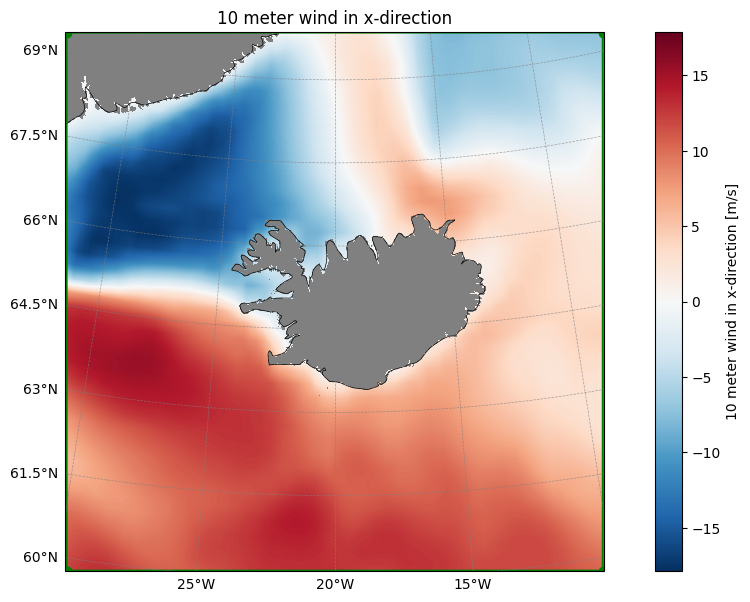

In [17]:
%%time
%%memit

surface_forcing.plot("uwnd")

## Saving as NetCDF or YAML file

Finally, we can save our tidal forcing as a netCDF file via the `.save` method.

In [18]:
filepath = "/pscratch/sd/n/nloose/forcing/my_surface_forcing.nc"

In [19]:
%%time
%%memit

surface_forcing.save(filepath)

Filename: /global/cfs/cdirs/m4746/Users/nora/roms-tools/roms_tools/setup/surface_forcing.py

Line #    Mem usage    Increment  Occurrences   Line Contents
   477  23122.2 MiB  23122.2 MiB           1       @profile
   478                                             def save(
   479                                                 self,
   480                                                 filepath: Union[str, Path],
   481                                                 np_eta: int = None,
   482                                                 np_xi: int = None,
   483                                                 group: bool = False,
   484                                             ) -> None:
   485                                                 """Save the surface forcing fields to one or more netCDF4 files.
   486                                         
   487                                                 This method saves the dataset either as a single file or as multiple f